<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/81_C_DOE_DBCA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2023 - DBCA**

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

# **3.0 Problema de aplicación. Supóngase un estudio en el que se quiere comprobar si el precio de la compra varía entre 4 cadenas de supermercado. Para ello, se selecciona una serie de elementos de la compra cotidiana y se registra su valor en cada uno de los supermercados ¿Existen evidencias de que el precio medio de la compra es diferente dependiendo del supermercado?**


## **3.1 Los Datos: Productos comunes y los precios de cada uo de Ellos en la Tienda**

In [ ]:
## **3.1 Los Datos: Productos comunes y los precios de cada uo de Ellos en la Tienda**
Producto  =  [ "lechuga" ,  "papas" ,  "leche" ,  "huevos" ,  "pan" ,  "cereal" ,  "carne.molida" , "tomate.sopa", "lavandería.detergente" , " aspirina" ]

Tienda_A = [ 1.755 , 2.655 , 2.235 , 0.975 , 2.370 , 4.695 , 3.135 , 0.930 , 8.235 , 6.690 ]
Tienda_B = [ 1.78,  1.98 ,  1.69 ,  0.99 ,  1.70 ,  3.15 ,  1.88 ,  0.65 ,  5.99 ,  4.84 ]
Tienda_C  =  [ 1.29 ,  1.99 ,  1.79 ,  0.69 ,  1.89 ,  2.99 ,  2.09 ,  0.65 ,  5.99 ,  4.99 ]
Tienda_D  =  [ 1.29 ,  1.99 ,  1.59 ,  1.09 ,  1.89 , 3.09 ,  2.49 ,  0.69 ,  6.99 ,  5.15 ]

## **3.2 Construyamos el dataFrame de los precios y productos**

In [ ]:
## **3.2 Construyamos el dataFrame de los precios y productos**
datos = pd.DataFrame({'Producto':Producto*4, 'Tienda':np.repeat(['A', 'B', 'C', 'D'],10), 'Precio':Tienda_A+Tienda_B+Tienda_C+Tienda_D})

## **3.3 Veamos el DataFrame**

In [ ]:
## **3.3 Veamos el DataFrame**
datos

,Producto,Tienda,Precio
0,lechuga,A,1.755
1,papas,A,2.655
2,leche,A,2.235
3,huevos,A,0.975
4,pan,A,2.370
5,cereal,A,4.695
6,carne.molida,A,3.135
7,tomate.sopa,A,0.930
8,lavandería.detergente,A,8.235
9,aspirina,A,6.690


## **3.4 Diagrama de caja**

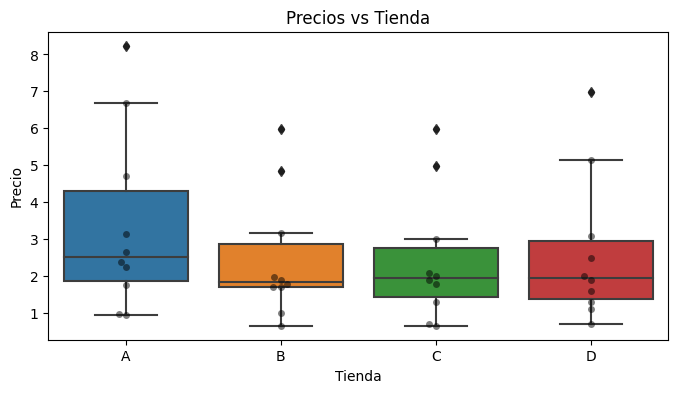

In [ ]:
## **3.4 Diagrama de caja**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Precios vs Tienda')
sns.boxplot(x="Tienda", y="Precio", data=datos, ax=ax)
sns.swarmplot(x="Tienda", y="Precio", data=datos, color='black', alpha=0.5, ax=ax);

## **3.5 Precio medios y desviación típica por tienda**

In [ ]:
## **3.5 Precio medios y desviación típica por tienda**
datos.groupby('Tienda')['Precio'].agg(['mean', 'std', 'min', 'max'])

,mean,std,min,max
Tienda,,,,
A,3.3675,2.440371,0.93,8.235
B,2.4650,1.707430,0.65,5.990
C,2.4360,1.765296,0.65,5.990
D,2.6260,1.987758,0.69,6.990


## **3.6 Cuartiles**

In [ ]:
## **3.6 Cuartiles**
datos.groupby('Tienda')['Precio'].quantile([.25, .50, .75])

Tienda      
A       0.25    1.8750
        0.50    2.5125
        0.75    4.3050
B       0.25    1.6925
        0.50    1.8300
        0.75    2.8575
C       0.25    1.4150
        0.50    1.9400
        0.75    2.7650
D       0.25    1.3650
        0.50    1.9400
        0.75    2.9400
Name: Precio, dtype: float64

## **3.7 Anova - Forma 1**

In [ ]:
## **3.7 Anova - Forma 1**

modelodatos = ols("Precio ~ Tienda+Producto", data = datos).fit()
anova_result = sm.stats.anova_lm(modelodatos, typ=2)
print (anova_result)

              sum_sq    df           F        PR(>F)
Tienda      5.737207   3.0   13.025212  1.897557e-05
Producto  139.479418   9.0  105.553625  1.102247e-18
Residual    3.964224  27.0         NaN           NaN


## **3.8 Anova - Forma 2**

In [ ]:
## **3.8 Anova - Forma 2**

modelodatos2 = smf.ols("Precio ~ Tienda+Producto", data = datos).fit()

print (modelodatos2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Precio   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     82.42
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           4.74e-18
Time:                        18:12:28   Log-Likelihood:                -10.526
No. Observations:                  40   AIC:                             47.05
Df Residuals:                      27   BIC:                             69.01
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

## **3.9 Anova - Forma 2  Test ANOVA de dos vías (Two-way ANOVA)**

In [ ]:
## **3.9 Anova - Forma 2  Test ANOVA de dos vías (Two-way ANOVA)**
# ==============================================================================
pg.rm_anova(
    data       = datos,
    dv         = 'Precio',
    within     = 'Tienda',
    subject    = 'Producto',
    detailed   = True,
    correction = 'auto'
).round(4)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,ng2,eps,sphericity,W-spher,p-spher
0,Tienda,5.7372,3,1.9124,13.0252,0.0,0.0017,0.0385,0.4682,False,0.129,0.0079
1,Error,3.9642,27,0.1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Nota: Dado que la esfericidad no se cumple (sphericity = False), hay que utilizar el p-value corregido, que está en la columna p-GG-corr. El análisis de varianza muestra evidencias significativas con un tamaño de efecto grande.**

## **3.10 Comparaciones múltiples**


Al tratarse de datos pareados, no se pueden calcular los intervalos Tukey HSD. En su lugar, se pueden utilizar t-test pareados.

# **a. Comparaciones Múltiples Forma 1**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9025,0.7441,-3.3067,1.5017,False
A,C,-0.9315,0.7253,-3.3357,1.4727,False
A,D,-0.7415,0.8396,-3.1457,1.6627,False
B,C,-0.029,1.0,-2.4332,2.3752,False
B,D,0.161,0.9979,-2.2432,2.5652,False
C,D,0.19,0.9965,-2.2142,2.5942,False


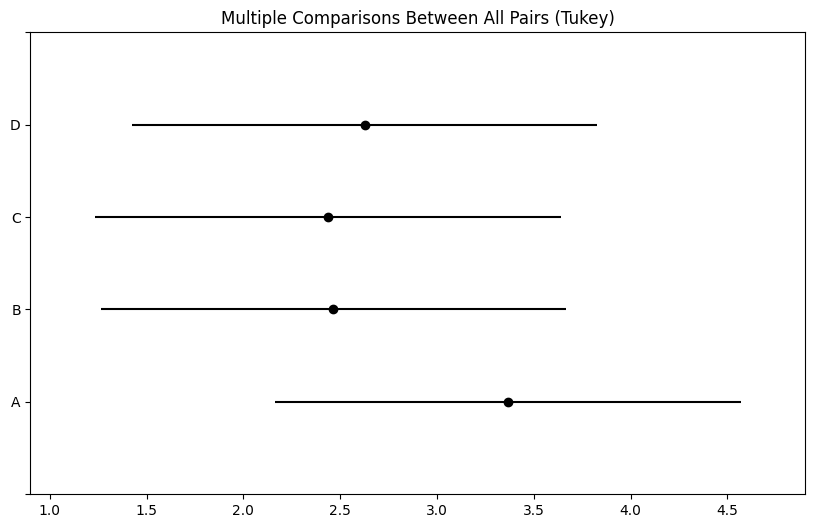

In [ ]:
# **a. Comparaciones Múltiples Forma 1**
tukey = pairwise_tukeyhsd(endog=datos["Precio"],     # Data
                          groups=datos["Tienda"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()

# **b. Comparaciones Múltiples Forma 2**

In [ ]:
# **b. Comparaciones Múltiples Forma 2**
pg.pairwise_ttests(
    dv      = 'Precio',
    within  = 'Tienda',
    subject = 'Producto',
    padjust = 'holm',
    data    = datos
)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Tienda,A,B,True,True,3.630938,9.0,two-sided,0.005478,0.021910,holm,10.073,0.410424
1,Tienda,A,C,True,True,4.166418,9.0,two-sided,0.002424,0.013625,holm,19.615,0.418894
2,Tienda,A,D,True,True,4.210567,9.0,two-sided,0.002271,0.013625,holm,20.701,0.319091
3,Tienda,B,C,True,True,0.405600,9.0,two-sided,0.694510,0.694510,holm,0.331,0.015994
4,Tienda,B,D,True,True,-1.242763,9.0,two-sided,0.245358,0.490715,holm,0.571,-0.083219
5,Tienda,C,D,True,True,-1.770733,9.0,two-sided,0.110379,0.331137,holm,0.983,-0.096803


### **Conclusión: El análisis ANOVA (incluyendo las correcciones dada la falta de esfericidad) encuentra diferencias significativas en el precio de los alimentos entre al menos 2 tiendas, siendo el tamaño del efecto grande. La posterior comparación dos a dos por t-student con corrección de significancia holm identifica como significativas las diferencias entre las tiendas A-B, A-C y A-D pero no entre B-C, B-D y C-D.**

## **3.11 Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Todos los datos**

# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
stats.shapiro(modelodatos.resid)

ShapiroResult(statistic=0.9828951358795166, pvalue=0.7949318289756775)

# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma- Todos los datos**

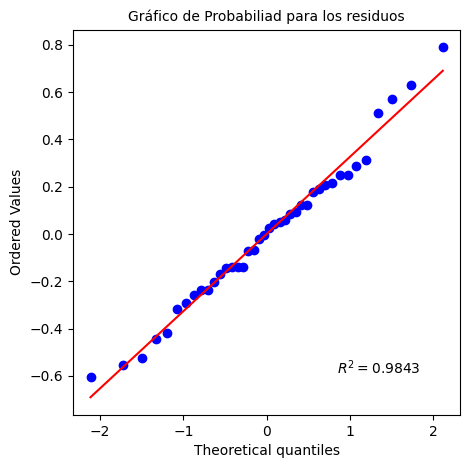

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modelodatos.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por tiendas**

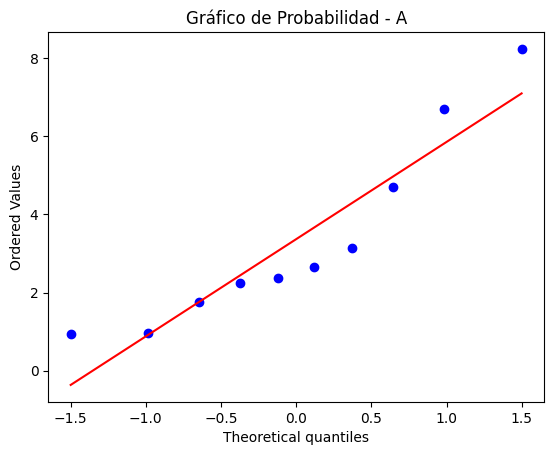

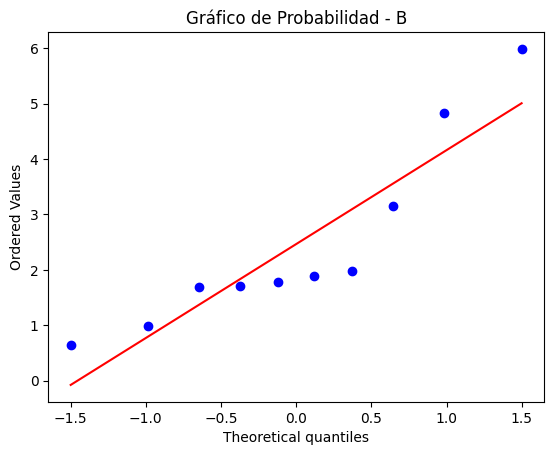

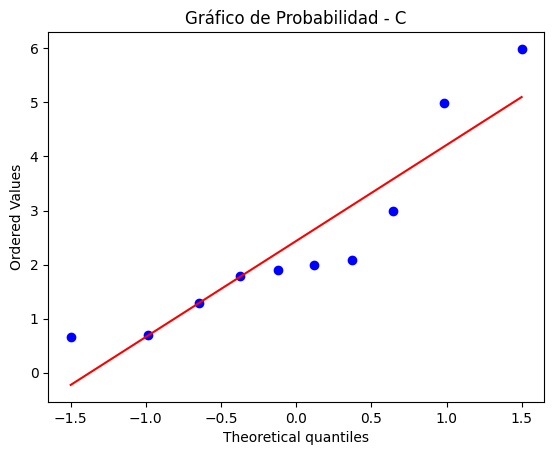

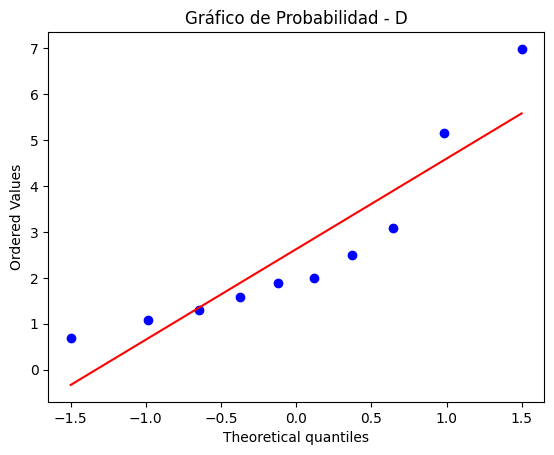

In [ ]:
## **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por tiendas**
unique_tienda = datos['Tienda'].unique()
for tienda in unique_tienda:
    stats.probplot(datos[datos['Tienda'] == tienda]['Precio'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+tienda)
    plt.show()

## **d. Histograma + curva normal teórica**

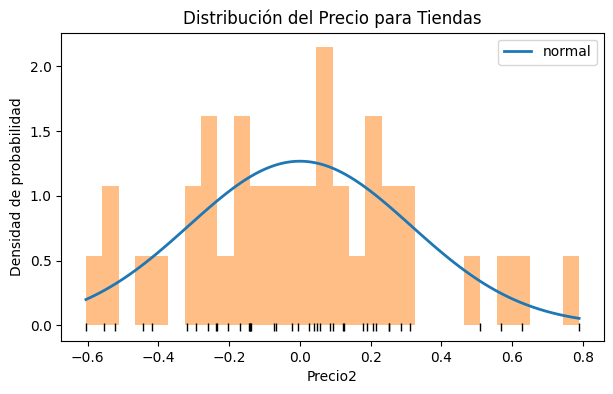

In [ ]:
## **d. Histograma + curva normal teórica**
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
Precio2 = modelodatos.resid
mu, sigma = stats.norm.fit(Precio2)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(Precio2), max(Precio2), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=Precio2, density=True, bins=30,  alpha=0.5)
ax.plot(Precio2, np.full_like(Precio2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución del Precio para Tiendas')
ax.set_xlabel('Precio2')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

## **e. Histograma de Residuos**

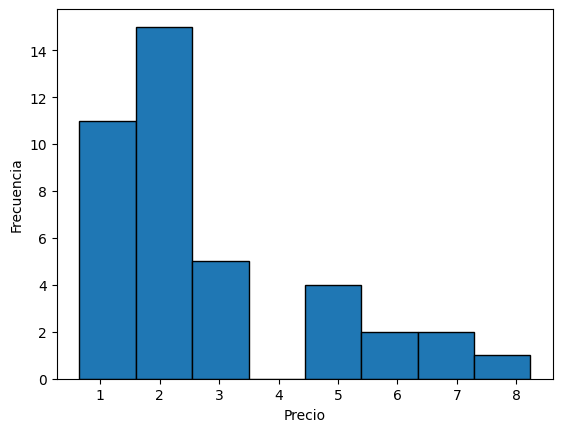

In [ ]:
## **e. Histograma de Residuos**
plt.hist(datos['Precio'], bins='auto', histtype='bar', ec='k')

plt.xlabel("Precio")
plt.ylabel('Frecuencia')
plt.show()

## **f. Gráfico Q-Q**

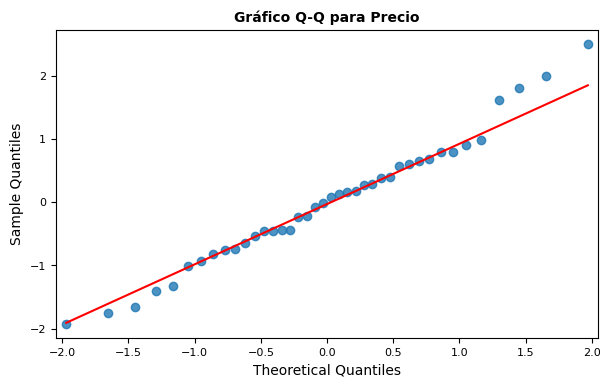

In [ ]:
## **f. Gráfico Q-Q**
# ==============================================================================
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    Precio2,
    fit   = True,
    line  = 'q',
    alpha = 0.8,
    lw    = 5,
    ax    = ax
)
ax.set_title('Gráfico Q-Q para Precio', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 8)

In [ ]:
# q. Homocedasticidad de los residuos: Usando la prueba de Levene
stats.levene(datos['Precio'][datos['Tienda'] == 'A'],
             datos['Precio'][datos['Tienda'] == 'B'],
             datos['Precio'][datos['Tienda'] == 'C'],
             datos['Precio'][datos['Tienda'] == 'D'])

LeveneResult(statistic=0.30085718125540684, pvalue=0.8245451842719157)